<font color='green'>### YOUR ANSWER HERE ###</font>



## **TASK 1:** Data Exploration & Preprosessing

### **STEP 1:** Main Statistics

Read, preprocess, and print the main statistics about the dataset.

In [190]:
### YOUR CODE HERE ###


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.hjkl_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, hjkls

In [1]:
import pandas as pd 
data=pd.read_csv("/Users/mahesh/Downloads/archive/realKnownCause/realKnownCause/machine_temperature_system_failure.csv")
data.head(10)

,timestamp,value
0,2013-12-02 21:15:00,73.967322
1,2013-12-02 21:20:00,74.935882
2,2013-12-02 21:25:00,76.124162
3,2013-12-02 21:30:00,78.140707
4,2013-12-02 21:35:00,79.329836
5,2013-12-02 21:40:00,78.710418
6,2013-12-02 21:45:00,80.269784
7,2013-12-02 21:50:00,80.272828
8,2013-12-02 21:55:00,80.353425
9,2013-12-02 22:00:00,79.486523


In [2]:
data.shape

(22695, 2)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22695 entries, 0 to 22694
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  22695 non-null  object 
 1   value      22695 non-null  float64
dtypes: float64(1), object(1)
memory usage: 354.7+ KB


In [4]:
data.describe()

,value
count,22695.000000
mean,85.926498
std,13.746912
min,2.084721
25%,83.080078
50%,89.408246
75%,94.016252
max,108.510543


In [5]:
data.isnull().sum()

timestamp    0
value        0
dtype: int64

In [6]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
22690    False
22691    False
22692    False
22693    False
22694    False
Length: 22695, dtype: bool

In [7]:
anomaly_pts = [
        ["2013-12-10 06:25:00.000000","2013-12-12 05:35:00.000000"],
        ["2013-12-15 17:50:00.000000","2013-12-17 17:00:00.000000"],
        ["2014-01-27 14:20:00.000000","2014-01-29 13:30:00.000000"],
        ["2014-02-07 14:55:00.000000","2014-02-09 14:05:00.000000"]
]
anomaly_pts

[['2013-12-10 06:25:00.000000', '2013-12-12 05:35:00.000000'],
 ['2013-12-15 17:50:00.000000', '2013-12-17 17:00:00.000000'],
 ['2014-01-27 14:20:00.000000', '2014-01-29 13:30:00.000000'],
 ['2014-02-07 14:55:00.000000', '2014-02-09 14:05:00.000000']]

In [8]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['anomaly'] = 0
for start, end in anomaly_pts:
    data.loc[((data['timestamp'] >= start) & (data['timestamp'] <= end)), 'anomaly'] = 1
data

,timestamp,value,anomaly
0,2013-12-02 21:15:00,73.967322,0
1,2013-12-02 21:20:00,74.935882,0
2,2013-12-02 21:25:00,76.124162,0
3,2013-12-02 21:30:00,78.140707,0
4,2013-12-02 21:35:00,79.329836,0
...,...,...,...
22690,2014-02-19 15:05:00,98.185415,0
22691,2014-02-19 15:10:00,97.804168,0
22692,2014-02-19 15:15:00,97.135468,0
22693,2014-02-19 15:20:00,98.056852,0


In [9]:

data['year'] = data['timestamp'].apply(lambda x:x.year)
data['month'] = data['timestamp'].apply(lambda x:x.month)
data['day'] = data['timestamp'].apply(lambda x:x.day)
data['hour'] = data['timestamp'].apply(lambda x:x.hour)
data['minute'] = data['timestamp'].apply(lambda x:x.minute)
data

,timestamp,value,anomaly,year,month,day,hour,minute
0,2013-12-02 21:15:00,73.967322,0,2013,12,2,21,15
1,2013-12-02 21:20:00,74.935882,0,2013,12,2,21,20
2,2013-12-02 21:25:00,76.124162,0,2013,12,2,21,25
3,2013-12-02 21:30:00,78.140707,0,2013,12,2,21,30
4,2013-12-02 21:35:00,79.329836,0,2013,12,2,21,35
...,...,...,...,...,...,...,...,...
22690,2014-02-19 15:05:00,98.185415,0,2014,2,19,15,5
22691,2014-02-19 15:10:00,97.804168,0,2014,2,19,15,10
22692,2014-02-19 15:15:00,97.135468,0,2014,2,19,15,15
22693,2014-02-19 15:20:00,98.056852,0,2014,2,19,15,20


In [10]:
data.nunique()

timestamp    22683
value        22695
anomaly          2
year             2
month            3
day             31
hour            24
minute          12
dtype: int64

In [11]:
data.describe()

,timestamp,value,anomaly,year,month,day,hour,minute
count,22695,22695.000000,22695.000000,22695.000000,22695.000000,22695.000000,22695.000000,22695.000000
mean,2014-01-11 06:16:49.887640576,85.926498,0.099934,2013.630535,5.300727,14.882750,11.475611,27.499009
min,2013-12-02 21:15:00,2.084721,0.000000,2013.000000,1.000000,1.000000,0.000000,0.000000
25%,2013-12-22 14:02:30,83.080078,0.000000,2013.000000,1.000000,8.000000,5.000000,15.000000
50%,2014-01-11 05:50:00,89.408246,0.000000,2014.000000,2.000000,14.000000,11.000000,25.000000
75%,2014-01-30 22:37:30,94.016252,0.000000,2014.000000,12.000000,22.000000,17.000000,40.000000
max,2014-02-19 15:25:00,108.510543,1.000000,2014.000000,12.000000,31.000000,23.000000,55.000000
std,NaN,13.746912,0.299918,0.482670,5.142640,8.517958,6.924890,17.259781


In [12]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
22690    False
22691    False
22692    False
22693    False
22694    False
Length: 22695, dtype: bool

In [13]:
data.isnull().sum()

timestamp    0
value        0
anomaly      0
year         0
month        0
day          0
hour         0
minute       0
dtype: int64

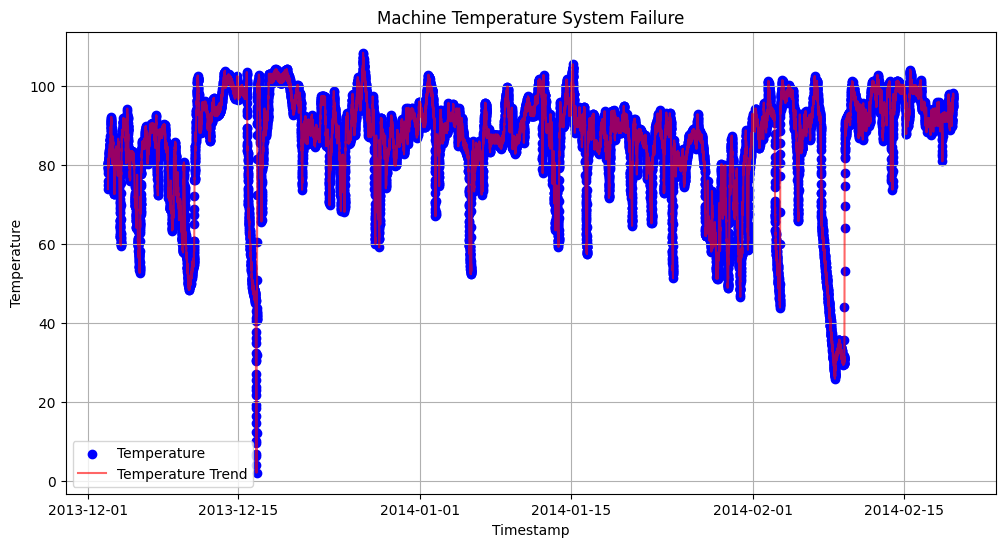

In [17]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(data['timestamp'], data['value'], color='blue', label='Temperature')
plt.plot(data['timestamp'], data['value'], color='red', alpha=0.6, label='Temperature Trend')
plt.title('Machine Temperature System Failure')
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()


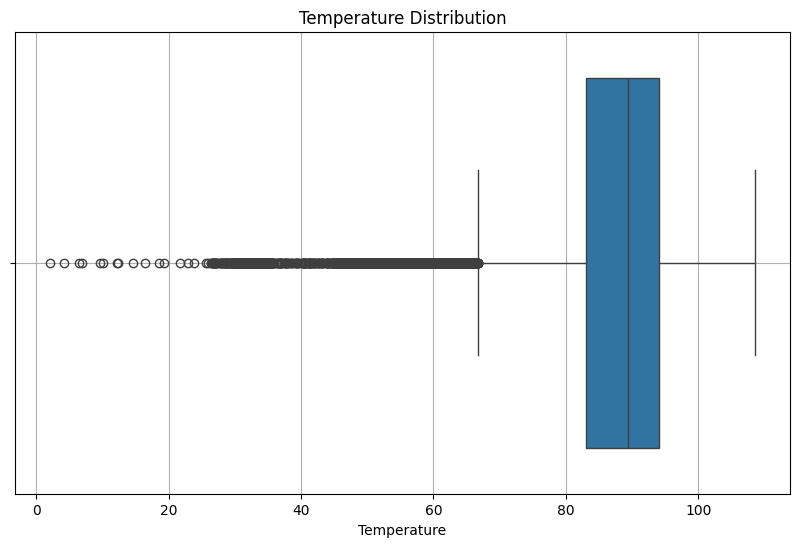

In [18]:
# Boxplot for Temperature Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=data['value'])
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.grid(True)
plt.show()


In [23]:
pip install hvplot


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 155 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 5.0 MB 54.9 MB/s eta 0:00:01
     |████████████████████████████████| 7.0 MB 11.3 MB/s eta 0:00:01
     |████████████████████████████████| 116 kB 24.0 MB/s eta 0:00:01
     |████████████████████████████████| 24.7 MB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 260 kB 9.1 MB/s eta 0:00:01
     |████████████████████████████████| 83 kB 6.9 MB/s eta 0:00:01
     |████████████████████████████████| 83 kB 7.0 MB/s  eta 0:00:01
     |████████████████████████████████| 162 kB 22.1 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 17.5 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd
import numpy as np
import hvplot.pandas

# Sample data generation (replace with your actual data)
np.random.seed(0)
dates = pd.date_range('2023-01-01', '2023-12-31', freq='D')
df = pd.DataFrame({'date': dates, 'value': np.random.randint(10, 30, len(dates))})
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Grouping and aggregating data
count = df.groupby(['year', 'month'])['value'].count().reset_index()
mean_temp = df.groupby(['year', 'month'])['value'].mean().reset_index()

# Plotting using hvplot
(count.hvplot.bar(x='month', y='value', by='year', xlabel='Month', ylabel='Count', stacked=True, legend='bottom') +
 mean_temp.hvplot.line(x='month', y='value', by='year', xlabel='Month', ylabel='Mean Temperature', legend='bottom')
).opts(width=800, height=400, title='Year/Month Count and Mean Temperature')


:Layout
   .Bars.I      :Bars   [month,year]   (value)
   .NdOverlay.I :NdOverlay   [year]
      :Curve   [month]   (value)

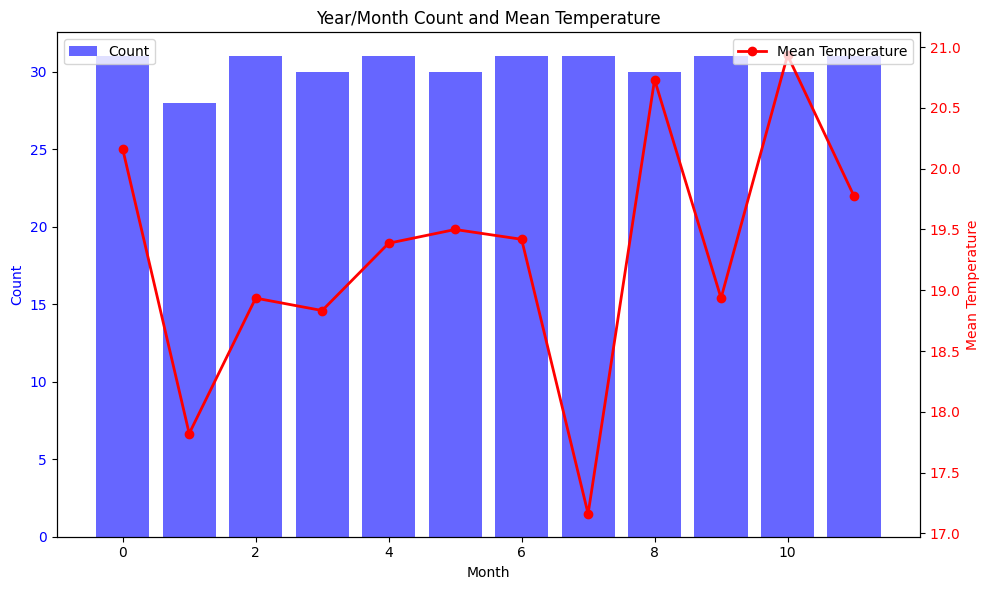

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data generation (replace with your actual data)
np.random.seed(0)
dates = pd.date_range('2023-01-01', '2023-12-31', freq='D')
df = pd.DataFrame({'date': dates, 'value': np.random.randint(10, 30, len(dates))})
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Grouping and aggregating data
count = df.groupby(['year', 'month'])['value'].count().reset_index()
mean_temp = df.groupby(['year', 'month'])['value'].mean().reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for count
ax1.bar(count.index, count['value'], color='b', alpha=0.6, label='Count')
ax1.set_xlabel('Month')
ax1.set_ylabel('Count', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Line plot for mean temperature
ax2 = ax1.twinx()
ax2.plot(mean_temp.index, mean_temp['value'], color='r', marker='o', linestyle='-', linewidth=2, label='Mean Temperature')
ax2.set_ylabel('Mean Temperature', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adding legends and title
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Year/Month Count and Mean Temperature')

plt.tight_layout()
plt.show()


In [204]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score
from torch.utils.data import DataLoader, TensorDataset
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

from torch.utils.data import Dataset,DataLoader,random_split
import numpy as np
import os
import matplotlib.pyplot as plt
import torch.nn.functional as F

from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import accuracy_score
import numpy as np
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.hjkl_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.hjkl_selection import train_test_split
import h5py


In [205]:
scaler = StandardScaler()
normal_values = scaler.fit_transform(data[['value']])
df = pd.DataFrame({'value': normal_values.flatten(), 'anomaly': data['anomaly']})

In [206]:

import torch

if torch.cuda.is_available():
  device=torch.device('cuda')
else:
  device=torch.device('cpu')
print(device)


cpu


In [207]:

X = df[['value']].values
y = df['anomaly'].values
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [208]:

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, X_train_tensor)
val_dataset = TensorDataset(X_val_tensor, X_val_tensor)
test_dataset = TensorDataset(X_test_tensor, X_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [209]:

class hjkl(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(hjkl, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 14),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(14, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

input_dim = X_train.shape[1]
encoding_dim = 14
mkghjr = hjkl(input_dim, encoding_dim)

criterion = nn.MSELoss()
optimizer = optim.Adam(mkghjr.parameters(), lr=0.001)

num_epochs = 10
train_losses = []
val_losses = []
train_accs = []
val_accs = []

mkghjr.train()
for epoch in range(num_epochs):
    train_loss = 0
    mkghjr.train()
    for data in train_loader:
        inputs, _ = data
        optimizer.zero_grad()
        outputs = mkghjr(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    val_loss = 0
    mkghjr.eval()
    with torch.no_grad():
        for data in val_loader:
            inputs, _ = data
            outputs = mkghjr(inputs)
            loss = criterion(outputs, inputs)
            val_loss += loss.item()
    
    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    
    mkghjr.eval()
    with torch.no_grad():
        
        train_outputs = mkghjr(X_train_tensor)
        train_mse = np.mean(np.power(X_train_tensor.numpy() - train_outputs.numpy(), 2), axis=1)
        train_threshold = np.percentile(train_mse, 95)
        train_anomalies = train_mse > train_threshold
        train_acc = np.mean(train_anomalies == y_train)
        train_accs.append(train_acc)
       
        val_outputs = mkghjr(X_val_tensor)
        val_mse = np.mean(np.power(X_val_tensor.numpy() - val_outputs.numpy(), 2), axis=1)
        val_threshold = np.percentile(val_mse, 95)
        val_anomalies = val_mse > val_threshold
        val_acc = np.mean(val_anomalies == y_val)
        val_accs.append(val_acc)
    
    print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")






Epoch [1/10], Train Loss: 0.9323, Val Loss: 0.7860, Train Acc: 0.9316, Val Acc: 0.9277
Epoch [2/10], Train Loss: 0.7547, Val Loss: 0.7525, Train Acc: 0.9316, Val Acc: 0.9277
Epoch [3/10], Train Loss: 0.7411, Val Loss: 0.7492, Train Acc: 0.9316, Val Acc: 0.9277
Epoch [4/10], Train Loss: 0.7399, Val Loss: 0.7485, Train Acc: 0.9316, Val Acc: 0.9277
Epoch [5/10], Train Loss: 0.7390, Val Loss: 0.7482, Train Acc: 0.9316, Val Acc: 0.9277
Epoch [6/10], Train Loss: 0.7388, Val Loss: 0.7479, Train Acc: 0.9316, Val Acc: 0.9277
Epoch [7/10], Train Loss: 0.7409, Val Loss: 0.7476, Train Acc: 0.9316, Val Acc: 0.9277
Epoch [8/10], Train Loss: 0.7396, Val Loss: 0.7474, Train Acc: 0.9316, Val Acc: 0.9277
Epoch [9/10], Train Loss: 0.7380, Val Loss: 0.7473, Train Acc: 0.9316, Val Acc: 0.9277
Epoch [10/10], Train Loss: 0.7395, Val Loss: 0.7472, Train Acc: 0.9316, Val Acc: 0.9277


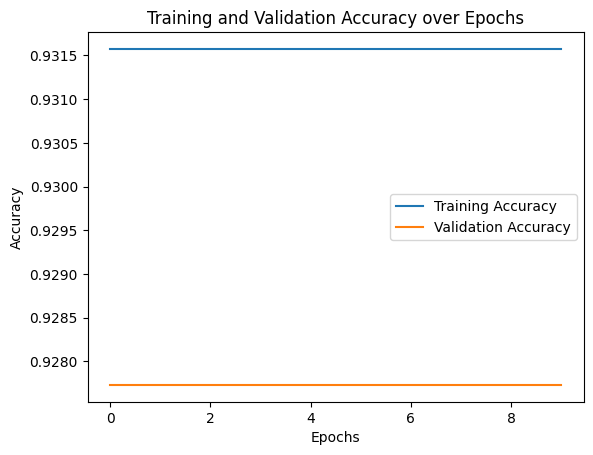

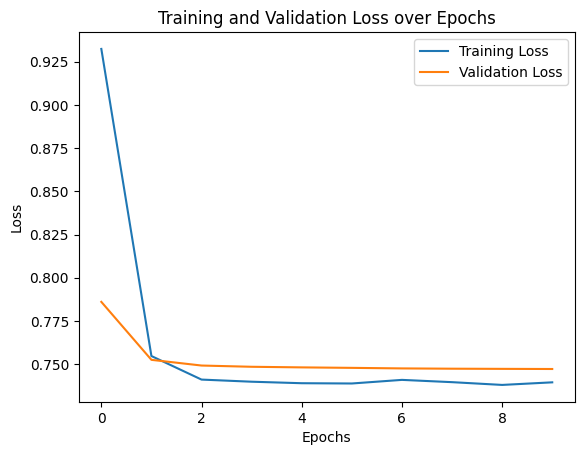

In [210]:

import matplotlib.pyplot as plt
plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()


plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [211]:

autoencoder = mkghjr.to(device)
autoencoder.eval()
test_loss = 0.0
predictions = []
targets = []

with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        test_loss += loss.item()
        mse = np.mean(np.power(inputs.cpu().numpy() - outputs.cpu().numpy(), 2), axis=1)
        predictions.extend(mse.tolist())
        targets.extend(_)

test_loss /= len(test_loader)
predictions = np.array(predictions)
targets = np.array(targets)
with torch.no_grad():
    val_outputs = autoencoder(X_val_tensor.to(device))
    val_mse = np.mean(np.power(X_val_tensor.cpu().numpy() - val_outputs.cpu().numpy(), 2), axis=1)
    threshold = np.percentile(val_mse, 90)

# Detect anomalies
anomaly = predictions > threshold
test_accuracy = np.mean(anomaly == y_test)
print(f'Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}')




Test Accuracy: 0.9151, Test Loss: 0.7629


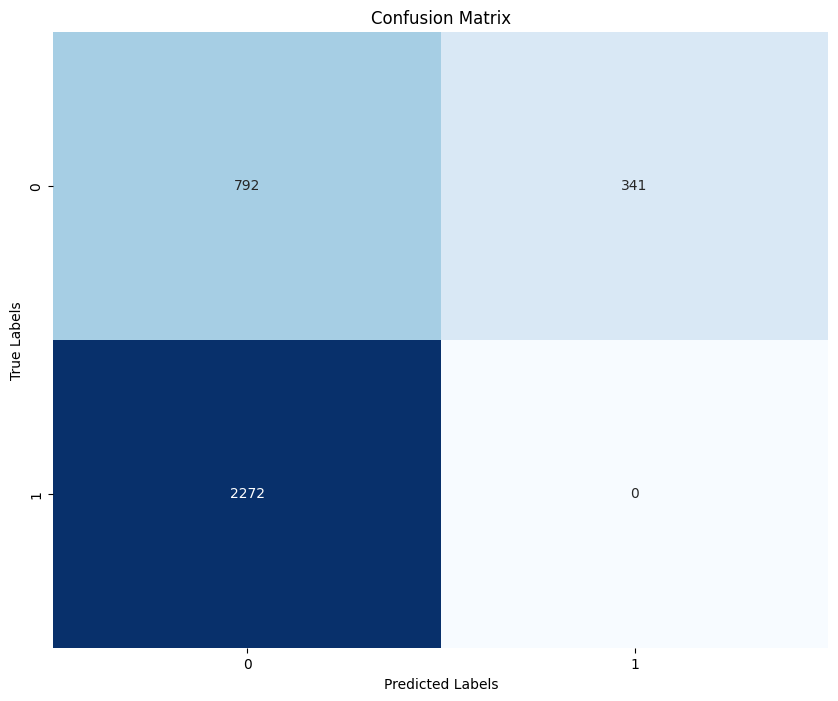

In [212]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

threshold = np.percentile(predictions, 90)
anomaly = (predictions > threshold).astype(int)
targets_binary = (targets > 0).astype(int)
predictions_binary = anomaly

conf_matrix = confusion_matrix(targets_binary, predictions_binary)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()




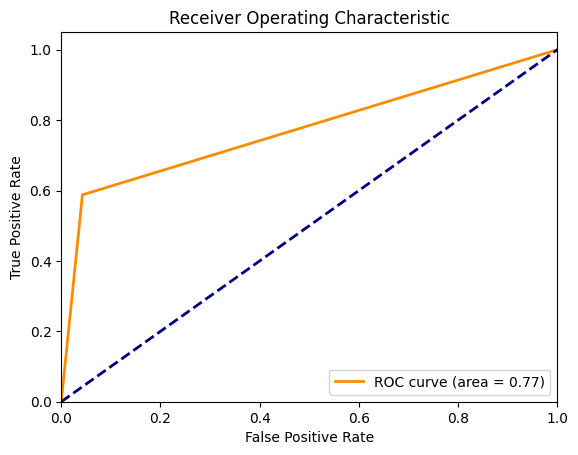

In [160]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, accuracy_score
fpr, tpr, _ = roc_curve(y_test, anomaly)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [161]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

precision = precision_score(y_test, anomaly)
recall = recall_score(y_test, anomaly)
f1 = f1_score(y_test, anomaly)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Precision: 0.6188
Recall: 0.5877
F1 Score: 0.6029


<font color='green'>### YOUR ANSWER HERE ###</font>



#### EXPERIMENT #1

In [267]:
class DenseAutoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(DenseAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),  # Increase from 32 to 128
            nn.ReLU(),
            nn.Linear(128, 64),  # New layer
            nn.ReLU(),
            nn.Linear(64, encoding_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 64),  # New layer
            nn.ReLU(),
            nn.Linear(64, 128),  # New layer
            nn.ReLU(),
            nn.Linear(128, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


input_dim = X_train.shape[1]
encoding_dim = 6
mdl = DenseAutoencoder(input_dim, encoding_dim)

criterion = nn.MSELoss()
optimizer = optim.Adam(mdl.parameters(), lr=0.001)

num_epochs = 10
train_losses = []
val_losses = []
train_accs = []
val_accs = []

mdl.train()
for epoch in range(num_epochs):
    train_loss = 0
    mdl.train()
    for data in train_loader:
        inputs, _ = data
        optimizer.zero_grad()
        outputs = mdl(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    val_loss = 0
    mdl.eval()
    with torch.no_grad():
        for data in val_loader:
            inputs, _ = data
            outputs = mdl(inputs)
            loss = criterion(outputs, inputs)
            val_loss += loss.item()
    
    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    
    mdl.eval()
    with torch.no_grad():
        
        train_outputs = mdl(X_train_tensor)
        train_mse = np.mean(np.power(X_train_tensor.numpy() - train_outputs.numpy(), 2), axis=1)
        train_threshold = np.percentile(train_mse, 98)
        train_anomalies = train_mse > train_threshold
        train_acc = np.mean(train_anomalies == y_train)
        train_accs.append(train_acc)
       
        val_outputs = mdl(X_val_tensor)
        val_mse = np.mean(np.power(X_val_tensor.numpy() - val_outputs.numpy(), 2), axis=1)
        val_threshold = np.percentile(val_mse, 98)
        val_anomalies = val_mse > val_threshold
        val_acc = np.mean(val_anomalies == y_val)
        val_accs.append(val_acc)
    
    print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")






   
    


Epoch [1/10], Train Loss: 0.7553, Val Loss: 0.7454, Train Acc: 0.9223, Val Acc: 0.9154
Epoch [2/10], Train Loss: 0.7360, Val Loss: 0.7454, Train Acc: 0.9223, Val Acc: 0.9154
Epoch [3/10], Train Loss: 0.7382, Val Loss: 0.7454, Train Acc: 0.9223, Val Acc: 0.9154
Epoch [4/10], Train Loss: 0.7364, Val Loss: 0.7454, Train Acc: 0.9223, Val Acc: 0.9154
Epoch [5/10], Train Loss: 0.7379, Val Loss: 0.7454, Train Acc: 0.9223, Val Acc: 0.9154
Epoch [6/10], Train Loss: 0.7365, Val Loss: 0.7454, Train Acc: 0.9223, Val Acc: 0.9154
Epoch [7/10], Train Loss: 0.7365, Val Loss: 0.7454, Train Acc: 0.9223, Val Acc: 0.9154
Epoch [8/10], Train Loss: 0.7363, Val Loss: 0.7454, Train Acc: 0.9223, Val Acc: 0.9154
Epoch [9/10], Train Loss: 0.7369, Val Loss: 0.7454, Train Acc: 0.9223, Val Acc: 0.9154
Epoch [10/10], Train Loss: 0.7388, Val Loss: 0.7454, Train Acc: 0.9223, Val Acc: 0.9154


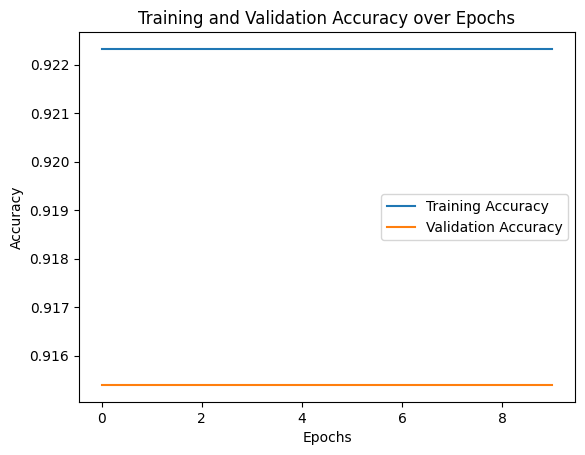

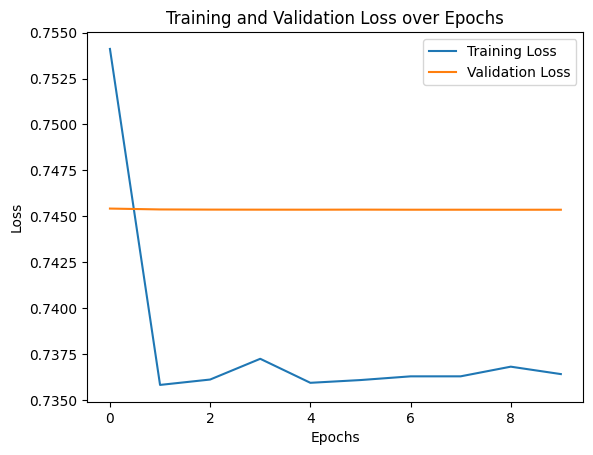

In [256]:

import matplotlib.pyplot as plt
plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()


plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [268]:

mkhn = mdl.to(device)
mkhn.eval()
test_loss = 0.0
predictions = []
targets = []

with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = mkhn(inputs)
        loss = criterion(outputs, inputs)
        test_loss += loss.item()
        mse = np.mean(np.power(inputs.cpu().numpy() - outputs.cpu().numpy(), 2), axis=1)
        predictions.extend(mse.tolist())
        targets.extend(_)

test_loss /= len(test_loader)
predictions = np.array(predictions)
targets = np.array(targets)
with torch.no_grad():
    val_outputs = mkhn(X_val_tensor.to(device))
    val_mse = np.mean(np.power(X_val_tensor.cpu().numpy() - val_outputs.cpu().numpy(), 2), axis=1)
    threshold = np.percentile(val_mse, 98)

# Detect anomalies
anomaly = predictions > threshold
test_accuracy = np.mean(anomaly == y_test)
print(f'Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}')




Test Accuracy: 0.9131, Test Loss: 0.7611


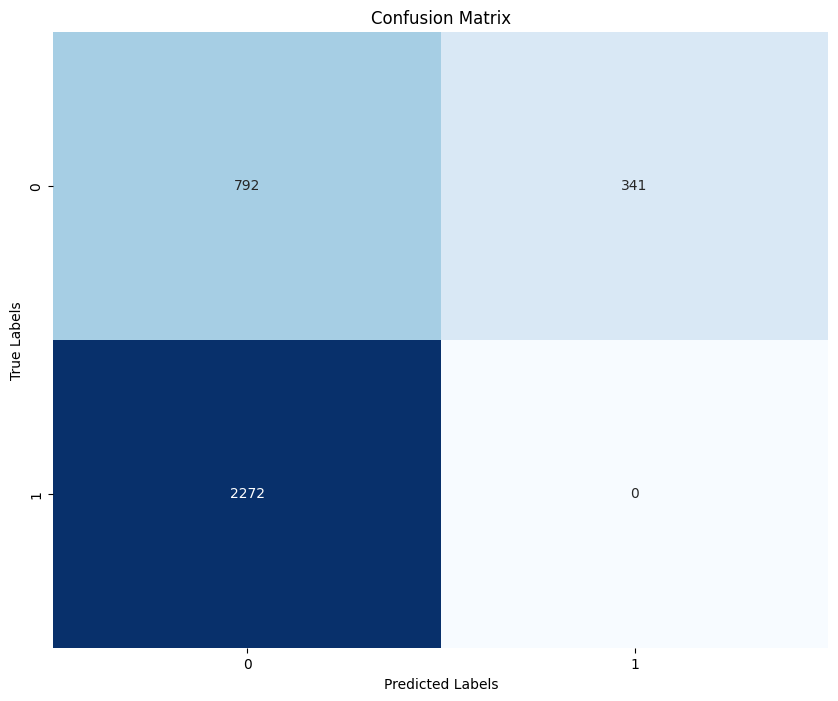

In [269]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

threshold = np.percentile(predictions, 90)
anomaly = (predictions > threshold).astype(int)
targets_binary = (targets > 0).astype(int)
predictions_binary = anomaly

conf_matrix = confusion_matrix(targets_binary, predictions_binary)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()




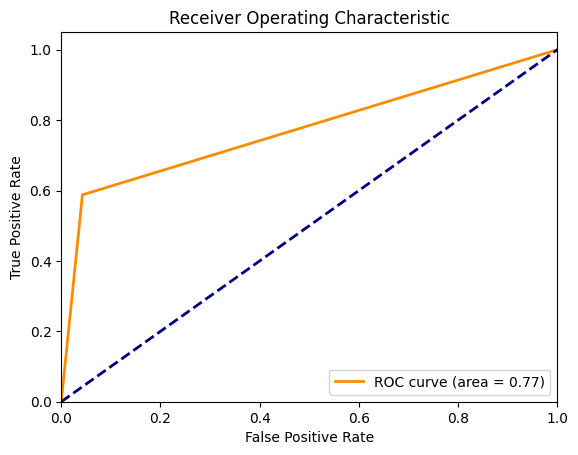

In [270]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, accuracy_score
fpr, tpr, _ = roc_curve(y_test, anomaly)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [271]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

precision = precision_score(y_test, anomaly)
recall = recall_score(y_test, anomaly)
f1 = f1_score(y_test, anomaly)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Precision: 0.6188
Recall: 0.5877
F1 Score: 0.6029


In [ ]:
## Experiment 2 

In [260]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv1d(in_channels=16, out_channels=8, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose1d(in_channels=8, out_channels=16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose1d(in_channels=16, out_channels=1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x.unsqueeze(1))  
        decoded = self.decoder(encoded).squeeze(1)  
        return decoded


hjkl=ConvAutoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(hjkl.parameters(), lr=0.001)

num_epochs = 20
train_losses = []
val_losses = []
train_accs = []
val_accs = []

hjkl.train()
for epoch in range(num_epochs):
    train_loss = 0
    hjkl.train()
    for data in train_loader:
        inputs, _ = data
        optimizer.zero_grad()
        outputs = hjkl(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    val_loss = 0
    hjkl.eval()
    with torch.no_grad():
        for data in val_loader:
            inputs, _ = data
            outputs = hjkl(inputs)
            loss = criterion(outputs, inputs)
            val_loss += loss.item()
    
    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    
    hjkl.eval()
    with torch.no_grad():
        
        train_outputs = hjkl(X_train_tensor)
        train_mse = np.mean(np.power(X_train_tensor.numpy() - train_outputs.numpy(), 2), axis=1)
        train_threshold = np.percentile(train_mse, 80)
        train_anomalies = train_mse > train_threshold
        train_acc = np.mean(train_anomalies == y_train)
        train_accs.append(train_acc)
       
        val_outputs = hjkl(X_val_tensor)
        val_mse = np.mean(np.power(X_val_tensor.numpy() - val_outputs.numpy(), 2), axis=1)
        val_threshold = np.percentile(val_mse, 80)
        val_anomalies = val_mse > val_threshold
        val_acc = np.mean(val_anomalies == y_val)
        val_accs.append(val_acc)
    
    print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")






            



   
    


    


Epoch [1/20], Train Loss: 0.8717, Val Loss: 0.7587, Train Acc: 0.8407, Val Acc: 0.8443
Epoch [2/20], Train Loss: 0.7414, Val Loss: 0.7472, Train Acc: 0.8416, Val Acc: 0.8455
Epoch [3/20], Train Loss: 0.7386, Val Loss: 0.7467, Train Acc: 0.8416, Val Acc: 0.8455
Epoch [4/20], Train Loss: 0.7387, Val Loss: 0.7465, Train Acc: 0.8416, Val Acc: 0.8455
Epoch [5/20], Train Loss: 0.7370, Val Loss: 0.7465, Train Acc: 0.8416, Val Acc: 0.8455
Epoch [6/20], Train Loss: 0.7372, Val Loss: 0.7465, Train Acc: 0.8416, Val Acc: 0.8455
Epoch [7/20], Train Loss: 0.7382, Val Loss: 0.7464, Train Acc: 0.8416, Val Acc: 0.8455
Epoch [8/20], Train Loss: 0.7373, Val Loss: 0.7464, Train Acc: 0.8416, Val Acc: 0.8455
Epoch [9/20], Train Loss: 0.7369, Val Loss: 0.7463, Train Acc: 0.8416, Val Acc: 0.8455
Epoch [10/20], Train Loss: 0.7369, Val Loss: 0.7464, Train Acc: 0.8416, Val Acc: 0.8455
Epoch [11/20], Train Loss: 0.7396, Val Loss: 0.7463, Train Acc: 0.8416, Val Acc: 0.8455
Epoch [12/20], Train Loss: 0.7369, Val Lo

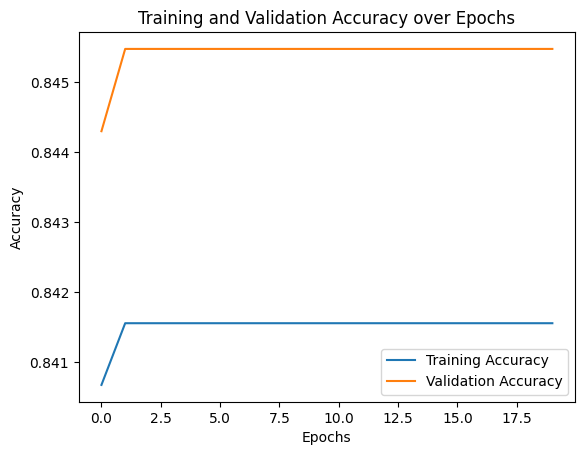

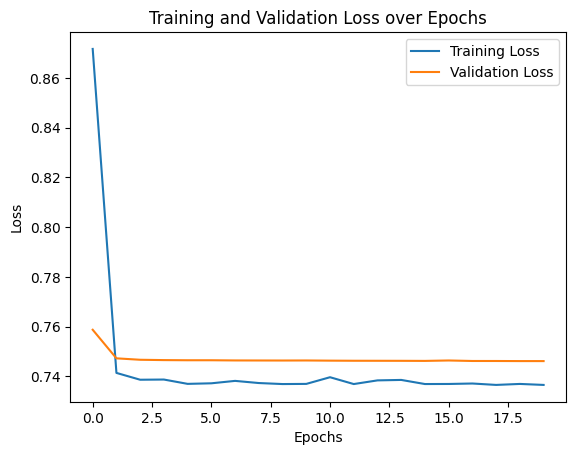

In [261]:

import matplotlib.pyplot as plt
plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()


plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [265]:
hjkl.eval()
test_loss = 0.0
predictions = []
targets = []

with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = hjkl(inputs)
        loss = criterion(outputs, inputs)
        test_loss += loss.item()
        mse = np.mean(np.power(inputs.cpu().numpy() - outputs.cpu().numpy(), 2), axis=1)
        predictions.extend(mse.tolist())
        targets.extend(_)

test_loss /= len(test_loader)
predictions = np.array(predictions)
targets = np.array(targets)


test_threshold = np.percentile(predictions, 80)
anomaly = predictions > test_threshold
test_accuracy = np.mean(anomaly == y_test)  
print(f'Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}')

Test Accuracy: 0.8461, Test Loss: 0.7619


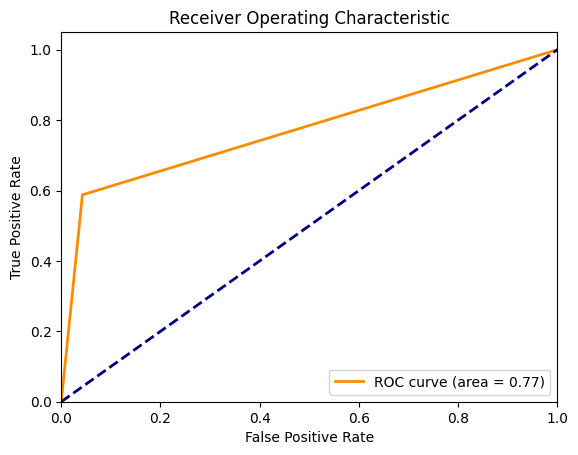

In [272]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, accuracy_score
fpr, tpr, _ = roc_curve(y_test, anomaly)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [273]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

precision = precision_score(y_test, anomaly)
recall = recall_score(y_test, anomaly)
f1 = f1_score(y_test, anomaly)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Precision: 0.6188
Recall: 0.5877
F1 Score: 0.6029


In [299]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class LSTMAutoencoder(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, seq_size=30):
        super(LSTMAutoencoder, self).__init__()
        self.hidden_size = hidden_size
        self.encoder = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.decoder = nn.LSTM(hidden_size, input_size, batch_first=True)

    def forward(self, x):
        _, (hidden, cell_state) = self.encoder(x)
        # print(x.size())
        encoded = hidden.view(1, x.size(1), self.hidden_size)
        decoded, _ = self.decoder(encoded.repeat(x.size(1), 1, 1))
        return decoded.permute(1, 0, 2)

# print(X_train)
# input_size = X_train.shape[0]
hidden_size = 64  
seq_size = 30 
# print(X_train.shape[1])
modell = LSTMAutoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(modell.parameters(), lr=0.001)

num_epochs = 20
train_losses = []
val_losses = []
train_accs = []
val_accs = []

modell.train()
for epoch in range(num_epochs):
    train_loss = 0
    modell.train()
    for data in train_loader:
        inputs, _ = data
        optimizer.zero_grad()
        # print(inputs.shape, inputs)
        outputs = modell(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    val_loss = 0
    modell.eval()
    with torch.no_grad():
        for data in val_loader:
            inputs, _ = data
            outputs = modell(inputs)
            loss = criterion(outputs, inputs)
            val_loss += loss.item()
    
    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    
    modell.eval()
    with torch.no_grad():
        train_outputs = modell(X_train_tensor)
        train_mse = np.mean(np.power(X_train_tensor.numpy() - train_outputs.numpy(), 2), axis=1)
        train_threshold = np.percentile(train_mse, 96)
        train_anomalies = train_mse > train_threshold
        train_acc = np.mean(train_anomalies == y_train)
        train_accs.append(train_acc)
       
        val_outputs = modell(X_val_tensor)
        val_mse = np.mean(np.power(X_val_tensor.numpy() - val_outputs.numpy(), 2), axis=1)
        val_threshold = np.percentile(val_mse, 96)
        val_anomalies = val_mse > val_threshold
        val_acc = np.mean(val_anomalies == y_val)
        val_accs.append(val_acc)
    
    print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")


Epoch [1/20], Train Loss: 0.9780, Val Loss: 0.9792, Train Acc: 0.9023, Val Acc: 0.8951
Epoch [2/20], Train Loss: 0.9636, Val Loss: 0.9801, Train Acc: 0.9023, Val Acc: 0.8951
Epoch [3/20], Train Loss: 0.9625, Val Loss: 0.9802, Train Acc: 0.9023, Val Acc: 0.8951
Epoch [4/20], Train Loss: 0.9655, Val Loss: 0.9787, Train Acc: 0.9023, Val Acc: 0.8951
Epoch [5/20], Train Loss: 0.9681, Val Loss: 0.9804, Train Acc: 0.9023, Val Acc: 0.8951
Epoch [6/20], Train Loss: 0.9640, Val Loss: 0.9789, Train Acc: 0.9023, Val Acc: 0.8951
Epoch [7/20], Train Loss: 0.9673, Val Loss: 0.9811, Train Acc: 0.9023, Val Acc: 0.8951
Epoch [8/20], Train Loss: 0.9619, Val Loss: 0.9819, Train Acc: 0.9023, Val Acc: 0.8951
Epoch [9/20], Train Loss: 0.9617, Val Loss: 0.9783, Train Acc: 0.9023, Val Acc: 0.8951
Epoch [10/20], Train Loss: 0.9636, Val Loss: 0.9784, Train Acc: 0.9023, Val Acc: 0.8951
Epoch [11/20], Train Loss: 0.9634, Val Loss: 0.9788, Train Acc: 0.9023, Val Acc: 0.8951
Epoch [12/20], Train Loss: 0.9641, Val Lo

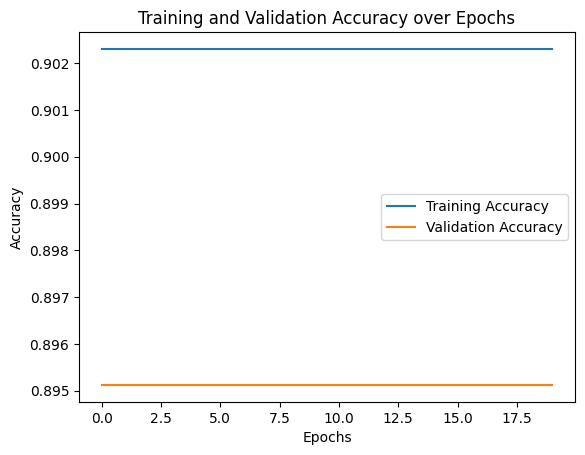

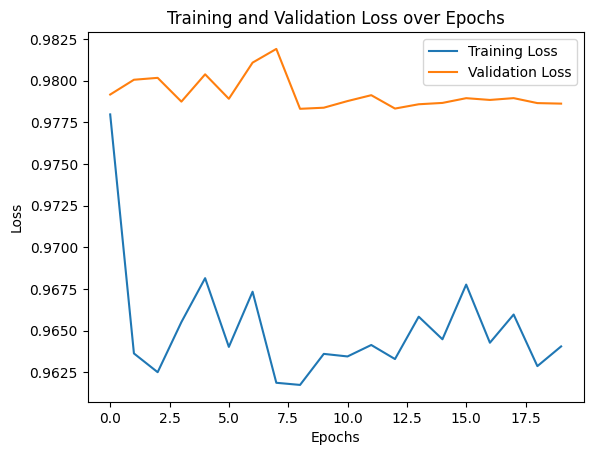

In [303]:

import matplotlib.pyplot as plt
plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()


plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [301]:
modell.eval()
test_loss = 0.0
predictions = []
targets = []

with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = modell(inputs)
        loss = criterion(outputs, inputs)
        test_loss += loss.item()
        mse = np.mean(np.power(inputs.cpu().numpy() - outputs.cpu().numpy(), 2), axis=1)
        predictions.extend(mse.tolist())
        targets.extend(_)

test_loss /= len(test_loader)
predictions = np.array(predictions)
targets = np.array(targets)


test_threshold = np.percentile(predictions, 95)
anomaly = predictions > test_threshold
test_accuracy = np.mean(anomaly == y_test)  
print(f'Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}')

Test Accuracy: 0.8503, Test Loss: 0.9873


## **References**

Include all the references that have been used to complete the assignment.

<font color='green'>### YOUR ANSWER HERE ###</font>

